In [22]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed(7)

In [37]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()
num_class = 10

In [24]:
x_train = ((x_train_origin/255)>0.5)*1
x_test = ((x_test_origin/255)>0.5)*1

In [25]:
y_train = to_categorical(y_train_origin, num_classes=10) 
y_test = to_categorical(y_test_origin, num_classes=10) 

In [5]:
def isSafe(X, i, j, visited): 
        # row number is in range, column number 
        # is in range and value is 0  
        # and not yet visited
        row = X.shape[0]
        col = X.shape[1]
        return (i >= 0 and i < row and 
                j >= 0 and j < col and 
                not visited[i][j] and X[i][j] == 0) 

In [6]:
def DFS(X, i, j, visited): 
  
        # These arrays are used to get row and  
        # column numbers of 8 neighbours  
        # of a given cell 
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
          
        # Mark this cell as visited 
        visited[i][j] = True
  
        # Recur for all connected neighbours 
        for k in range(8): 
            if isSafe(X, i + rowNbr[k], j + colNbr[k], visited): 
                DFS(X, i + rowNbr[k], j + colNbr[k], visited)

In [7]:
def countIslands(X): 
    # Make a bool array to mark visited cells. 
    # Initially all cells are unvisited
    row = X.shape[0]
    col = X.shape[1]    
    visited = [[False for j in range(col)]for i in range(row)] 

    # Initialize count as 0 and travese  
    # through the all cells of 
    # given matrix 
    count = 0
    for i in range(row): 
        for j in range(col): 
            # If a cell with value 1 is not visited yet,  
            # then new island found 
            if visited[i][j] == False and X[i][j] == 0: 
                # Visit all cells in this island  
                # and increment island count 
                DFS(X, i, j, visited) 
                count += 1

    return count

In [27]:
# training dataset with extra feature 
white_area = np.zeros((x_train.shape[0],1))

for i in range (x_train.shape[0]):
    x = x_train[i]
    white_area[i, 0] = countIslands(x)

In [33]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_train = np.append(x_train, white_area/3, axis = 1)

In [35]:
# test dataset with extra feature 
white_area = np.zeros((x_test.shape[0],1))

for i in range (x_test.shape[0]):
    x = x_test[i]
    white_area[i, 0] = countIslands(x)

In [38]:
x_test = x_test_origin.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

x_test = np.append(x_test, white_area/3, axis = 1)

In [39]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=785, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.0699 - acc: 0.2967 - val_loss: 1.7965 - val_acc: 0.5462
Epoch 2/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.6375 - acc: 0.6297 - val_loss: 1.4580 - val_acc: 0.6941
Epoch 3/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.3659 - acc: 0.7186 - val_loss: 1.2387 - val_acc: 0.7544
Epoch 4/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.1861 - acc: 0.7601 - val_loss: 1.0898 - val_acc: 0.7862
Epoch 5/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.0607 - acc: 0.7857 - val_loss: 0.9833 - val_acc: 0.8050
Epoch 6/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.9688 - acc: 0.8029 - val_loss: 0.9036 - val_acc: 0.8195
Epoch 7/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.8987 - acc: 0.8151 - val_loss: 0.8417 - val_acc: 0.83

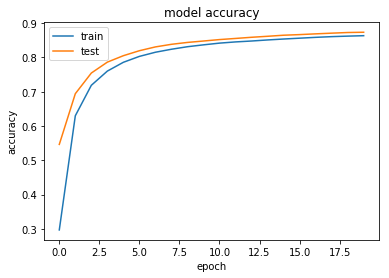

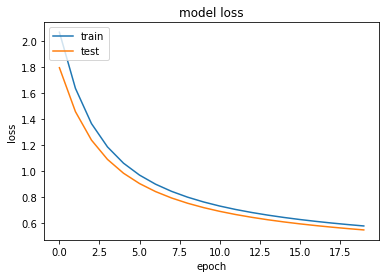

In [40]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()